# Аналитика развлекательного приложения Procrastinate Pro+

Основная задача — разобраться в причинах и помочь компании выйти в плюс, т.к. несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* лог сервера с данными об их посещениях,

* выгрузка их покупок за этот период,

* рекламные расходы.

Требуется изучить:

* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

Описание данных:

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# загрузим файлы с данными и сохраненим в df

try:
    visit, order, cost = (
        pd.read_csv('/Users/Амина/Downloads/visits_info_short.csv'),
        pd.read_csv('/Users/Амина/Downloads/orders_info_short.csv'),
        pd.read_csv('/Users/Амина/Downloads/costs_info_short.csv')
    )


except:
    visit, order, cost = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )

In [3]:
# изучим visits

display(visit.info())
visit.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
# посмотрим пропуски

round((visit.isna().mean()*100),2)

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

In [5]:
# посмотрим дубликаты

visit.duplicated().sum()

0

In [6]:
# приведем наименования столбцов к единому стилю

visit.columns = [name.lower().replace(' ', '_') for name in visit.columns]
display(visit.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [7]:
visit['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

Имеются данные о пользователях из 4-х стран - США, Англии, Франции, Германии.

In [8]:
visit['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Среди данных об устройствах представлены: iPhone, Android, PC, Mac. Больше всего пользователей: iPhone (112603), а меньше: Mac (62022) .

In [9]:
visit['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

Уникальных пользователей: 150008. Самый частый- 46 раз.

In [10]:
# преобразуем данные о времени

visit['session_start'] = pd.to_datetime(visit['session_start'])
visit['session_end'] = pd.to_datetime(visit['session_end'])

In [11]:
visit['session_start'].count()

309901

In [12]:
visit['session_start'].value_counts()

2019-06-27 14:56:41    3
2019-10-10 22:50:07    3
2019-08-24 12:06:37    3
2019-10-22 17:17:39    3
2019-10-26 12:40:03    3
                      ..
2019-05-26 12:24:05    1
2019-08-28 17:43:34    1
2019-10-11 08:34:00    1
2019-05-13 07:58:36    1
2019-06-25 21:23:48    1
Name: session_start, Length: 306813, dtype: int64

Всего 306813 уникальных записей с информацией о начале сессии. Всего записей - 309901.

In [13]:
visit['session_end'].count()

309901

In [14]:
visit['session_end'].value_counts()

2019-08-04 10:32:15    3
2019-09-23 20:37:13    3
2019-08-03 06:31:26    3
2019-09-29 17:32:12    3
2019-09-26 08:30:19    3
                      ..
2019-10-27 23:08:22    1
2019-08-25 01:02:51    1
2019-06-17 02:33:04    1
2019-10-16 03:17:54    1
2019-05-08 23:10:58    1
Name: session_end, Length: 306793, dtype: int64

И 306793 уникальных записей с информацией о конце сессии. Всего записей также 309901.

In [15]:
# изучим order

display(order.info())
order.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [16]:
# приведем наименования столбцов к единому стилю

order.columns = [name.lower().replace(' ', '_') for name in order.columns]
display(order.columns)

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [17]:
# посмотрим пропуски

round((order.isna().mean()*100),2)

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

In [18]:
# преобразуем данные о времени

order['event_dt'] = pd.to_datetime(order['event_dt'])

In [19]:
# посмотрим дубликаты

order.duplicated().sum()

0

In [20]:
order['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

В информации о заказах у нас присутствует 8881 уникальный пользователь, самый часто заказывающий - пользователь с user_id 901180916748 - 22 раза.

In [21]:
order['event_dt'].count()

40212

In [22]:
order['event_dt'].value_counts()

2019-09-29 09:03:24    2
2019-10-25 16:24:24    2
2019-09-27 03:56:55    2
2019-08-12 22:50:49    2
2019-09-09 20:01:39    2
                      ..
2019-09-26 04:24:10    1
2019-10-26 06:25:45    1
2019-07-10 17:04:38    1
2019-08-06 08:55:42    1
2019-09-25 16:41:33    1
Name: event_dt, Length: 40163, dtype: int64

Всего 40212 строк с информацией о заказах. Из них 40163 с уникальным 'event_dt'.

In [23]:
order['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

В среднем каждый заказ совершается на сумму 5.37. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99. Можно предположить, что это стоимость подписки.

In [24]:
# изучим cost

display(cost.info())
cost.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [25]:
# посмотрим пропуски

round((cost.isna().mean()*100),2)

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

In [26]:
# приведем наименования столбцов к единому стилю

cost.columns = cost.columns.str.lower()
display(cost.columns)

Index(['dt', 'channel', 'costs'], dtype='object')

In [27]:
# преобразуем данные о времени

cost['dt'] = pd.to_datetime(cost['dt'])

In [28]:
# посмотрим дубликаты

cost.duplicated().sum()

0

In [29]:
cost['dt'].count()

1800

In [30]:
cost['dt'].value_counts()

2019-10-10    10
2019-06-01    10
2019-08-30    10
2019-10-14    10
2019-06-12    10
              ..
2019-05-24    10
2019-07-08    10
2019-08-22    10
2019-10-06    10
2019-08-26    10
Name: dt, Length: 180, dtype: int64

Всего 1800 строк с данными о затратах на маркетинг. Из них 180 уникальных строк с датами, то есть, собраны данные за 180 дней.

In [31]:
cost['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Имеется информация в данных по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'.

In [32]:
cost['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Средние и медианные затраты на маркетинг разнятся (58.6 и 12.2 соответственно) - возможно, что на какие-то каналы уходит бльше трат, на какие-то меньше. Максимальная трата на маркетинг - 630 , минимальные - 0.8.

#### Вывод
В качестве входных данных у нас - три выгрузки из развлекательного приложения Procrastinate Pro+. Наша задача — разобраться в причинах убытков компании и помочь компании выйти в плюс. У нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

На данном этапе мы положили данные о визитах, заказах и рекламных тратах в переменные и подготовили данные к анализу. Также проверили, что в данных отсутствуют дубликаты и что тип данных во всех колонках соответствует значениям, привели наименования столбцов к единому стилю. 
Имеются данные о пользователях из 4-х стран - США, Англии, Франции, Германии.
Среди данных об устройствах представлены: iPhone, Android, PC, Mac. Больше всего пользователей: iPhone (112603), а меньше: Mac (62022). Уникальных пользователей: 150008. Самый частый- 46 раз.
Всего 306813 уникальных записей с информацией о начале сессии. Всего записей - 309901.
И 306793 уникальных записей с информацией о конце сессии. Всего записей также 309901.
В информации о заказах у нас присутствует 8881 уникальный пользователь, самый часто заказывающий - пользователь с user_id 901180916748 - 22 раза.
Всего 40212 строк с информацией о заказах. Из них 40163 с уникальным 'event_dt'.
В среднем каждый заказ совершается на сумму 5.37. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99. Можно предположить, что это стоимость подписки.
Всего 1800 строк с данными о затратах на маркетинг. Из них 180 уникальных строк с датами, то есть, собраны данные за 180 дней.
Имеется информация в данных по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'.
Средние и медианные затраты на маркетинг разнятся (58.6 и 12.2 соответственно) - возможно, что на какие-то каналы уходит бльше трат, на какие-то меньше. Максимальная трата на маркетинг - 630 , минимальные - 0.8.



### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [33]:
import time
from datetime import datetime
from datetime import date, timedelta as td

observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [34]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [35]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [36]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [37]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Вывод
Заданы функции LTV, ROI, удержания(retention), конверсии(conversion).

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей

In [38]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [39]:
# получаем профили пользователей

profiles = get_profiles(visit, order, cost)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [40]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [41]:
# Определим минимальную и максимальную даты привлечения пользователей.

min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [42]:
print(min_analysis_date, "\n", observation_date)

2019-05-01 00:00:00 
 2019-10-27 00:00:00


##### Минимальная дата привлечения пользователей - 1 мая 2019 года. 
##### Максимальная дата привлечения пользователей - 27 октября 2019 года.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [43]:
visit.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [44]:
# Построим таблицу, отражающую количество пользователей и их долю из каждой страны.

region_share = pd.DataFrame()
region_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_share['share'] = ((region_share['users_cnt'] / profiles['region'].count()) * 100)
region_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Исходя из результатов, большая доля пользователей - это люди из США (66.66%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%).

In [45]:
# Посмотрим на платящих пользователей и долю платящих из каждой страны.

region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = ((region_payer_share['users_cnt'] / profiles.query('payer == True')['region'].count()) * 100)
region_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


In [46]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Платящие пользователи из США максимальное значение (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (~ 7%)

In [47]:
# Рассчитаем долю платящих пользователей отдельно по странам.

def pivot_share_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%', 'payer_share': '{:.2f}%'}
                                                                             )

In [48]:
pivot_share_result('region', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


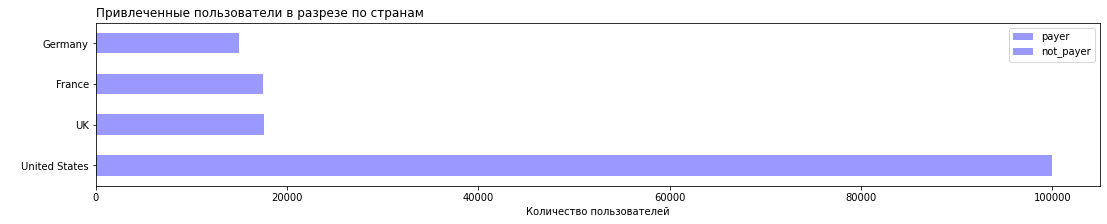

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [49]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )


fig, ax = plt.subplots(figsize=(18, 3))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, color = "blue", ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе по странам',loc='left')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

Исходя из данных, видно, что доля платящих пользователей(100002) из США - 6.90% (6902 человек). Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции. Всего пользователей 17450, (3.80% платящих пользователей - 663 человека). Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.11%).

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [50]:
device_share = pd.DataFrame()
device_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_share['share'] = ((device_share['users_cnt'] / profiles['device'].count()) * 100)
device_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Исходя из данных таблицы, большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).

In [51]:
# Изучим распределение для платящих пользователей.

device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = ((device_payer_share['users_cnt'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Основная доля платящих пользователей - это владельцы IPhone (38%). Далее идут владельцы Android (23%), Mac(21%) и PC(17%).

In [52]:
# Рассчитаем долю платящих пользователей отдельно по устройствам

pivot_share_result('device', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


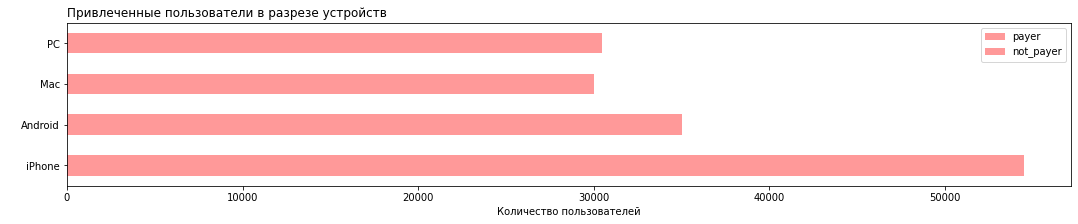

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


In [53]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )


fig, ax = plt.subplots(figsize=(18, 3))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, color="red", ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе устройств',loc='left')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт. Среди пользователей iPhone (54479 человек) доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [54]:
channel_share = pd.DataFrame()
channel_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_share['share'] = ((channel_share['users_cnt'] / profiles['channel'].count()) * 100)

channel_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_share['payer_share'] = ((channel_share['payer_users_cnt'] / profiles.query('payer == True')['channel'].count()) * 100)

channel_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users_cnt,share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,13.06%
FaceBoom,29144,19.43%,3557,40.05%
TipTop,19561,13.04%,1878,21.15%
OppleCreativeMedia,8605,5.74%,233,2.62%
LeapBob,8553,5.70%,262,2.95%
WahooNetBanner,8553,5.70%,453,5.10%
RocketSuperAds,4448,2.97%,352,3.96%
MediaTornado,4364,2.91%,156,1.76%
YRabbit,4312,2.87%,165,1.86%


Анализируя по разбивке по источникам привлечения для всех пользователей (и платящих, и не платящих), то можно заметить, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom (40%), 21% из TipTop и только 13% - из органического трафика.

По остальным каналам распределение равномерное (в районе 3-5%). Самый непопулярный канал для всех сегментов пользователей - это lambdaMediaAds, для платящих - MediaTornado.

In [55]:
channel_payer_share = pd.DataFrame()
channel_payer_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer_share['share'] = 100*(channel_payer_share['payer_users_cnt'] / channel_payer_share['users_cnt']) 
channel_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


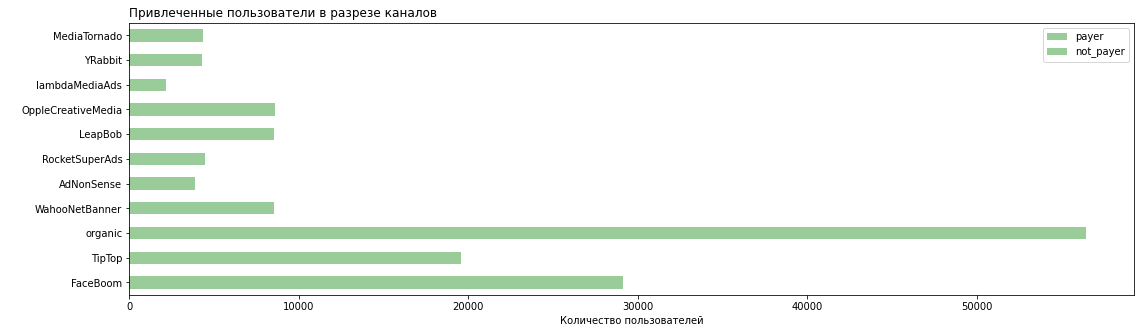

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
organic,55279,1160,2.06
WahooNetBanner,8100,453,5.30
AdNonSense,3440,440,11.34
RocketSuperAds,4096,352,7.91
LeapBob,8291,262,3.06
OppleCreativeMedia,8372,233,2.71
lambdaMediaAds,1924,225,10.47


In [56]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )


fig, ax = plt.subplots(figsize=(18, 5))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, color="green", ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel(' ')
ax.set_title('Привлеченные пользователи в разрезе каналов',loc='left')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel

Большинство платящих пользователей приходится на каналы FaceBoom (12.2%), AdNonSense(11.3%) и lambdaMediaAds(10.5%). Менее всего конвертируются пользователи из каналов organic (2.1%), OppleCreativeMedia (2.7%) и LeapBob (3.1%).

#### Вывод
На данном этапе были сформированы профили пользователей. Для этого использовалась функция get_profiles(), в которую были переданы данные о посещениях, покупках и тратах на рекламу. Определены минимальная и максимальная даты привлечения пользователей. Это 2019-05-01 00:00:00 и 2019-10-27 00:00:00.

Построена таблица, отражающую количество пользователей и их долю из каждой страны. Судя по результатам, большая доля пользователей - это люди из США (66.66%).  Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%).

Изучены платящие пользователи и их долю из каждой страны. Платящие пользователи из США лидируют (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (~ 7%).  Также выявлено, что доля платящих пользователей (100002) из США - 6.90% (6902 человек). Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции. Всего пользователей 17450, (3.80% платящих пользователей - 663 человека). Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.11%).

Было изучено, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи. Судя по таблице, большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт. Среди пользователей iPhone (54479 человек) доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

Анализируя по разбивке по источникам привлечения для всех пользователей (и платящих, и не платящих), то можно заметить, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom (40%), 21% из TipTop и только 13% - из органического трафика.

По остальным каналам распределение равномерное (в районе 3-5%). Самый непопулярный канал для всех сегментов пользователей - это lambdaMediaAds, для платящих - MediaTornado.

Большинство платящих пользователей приходится на каналы FaceBoom (12.2%), AdNonSense(11.3%) и lambdaMediaAds(10.5%). Менее всего конвертируются пользователи из каналов organic (2.1%), OppleCreativeMedia (2.7%) и LeapBob (3.1%).


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [57]:
cost.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [58]:
print(f'Общая сумма затрат на рекламу: {cost.costs.sum().round()}')

Общая сумма затрат на рекламу: 105497.0


In [59]:
cost.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [60]:
cost.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


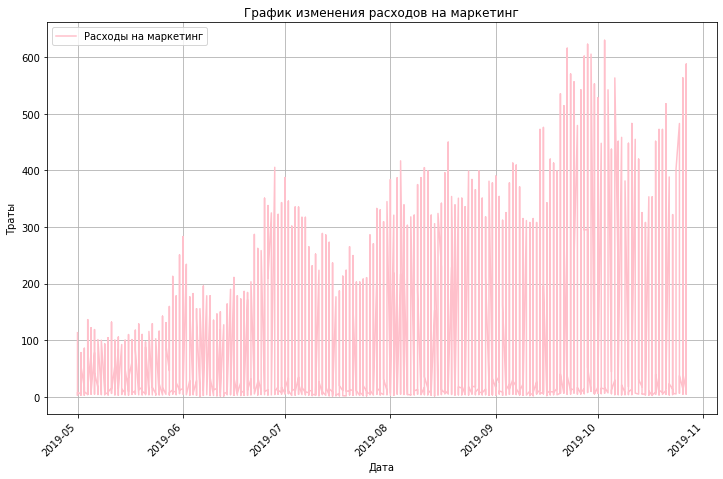

In [61]:
cost.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=True,# выводить ли легенду к графику
           color="pink") 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Исходя из графика видно увеличение расходов на маркетинг в течении времени. В конце сентября - начале октября они достигли исторического пика 630, после чего стали немного снижаться до 400, а затем к концу октября вновь стремились к 600.

In [62]:
# Посмотрим, как траты распределены по источникам.

cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [63]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = cost.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / cost['costs'].sum()) * 100)
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Больше всего трат приходится на источник TipTop (51.90%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

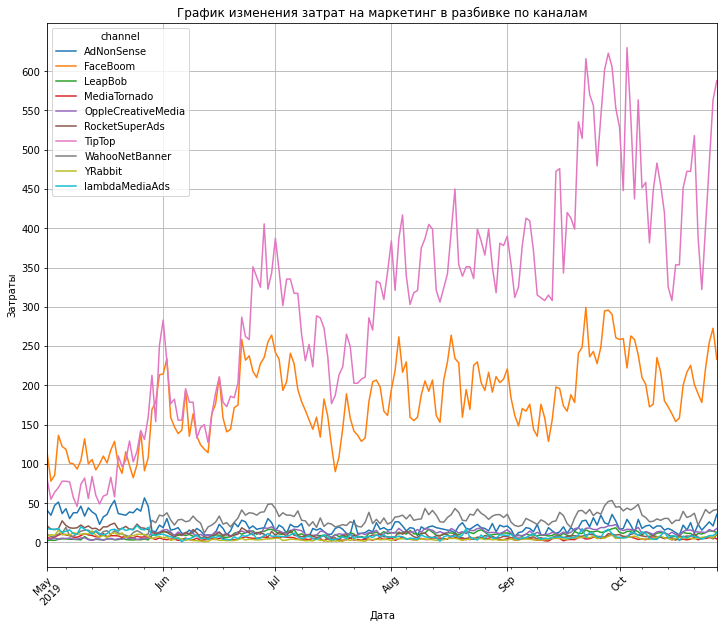

In [64]:
# Построим визуализацию динамики изменения расходов во времени

filtered_data = cost.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           
) 

plt.yticks(np.arange(0, 650, 50)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Больше всего трафика закупали у TipTop и к октябрю число трат приближалось к 650. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, т.к. на этом графике данные по ним недостаточно показательны.

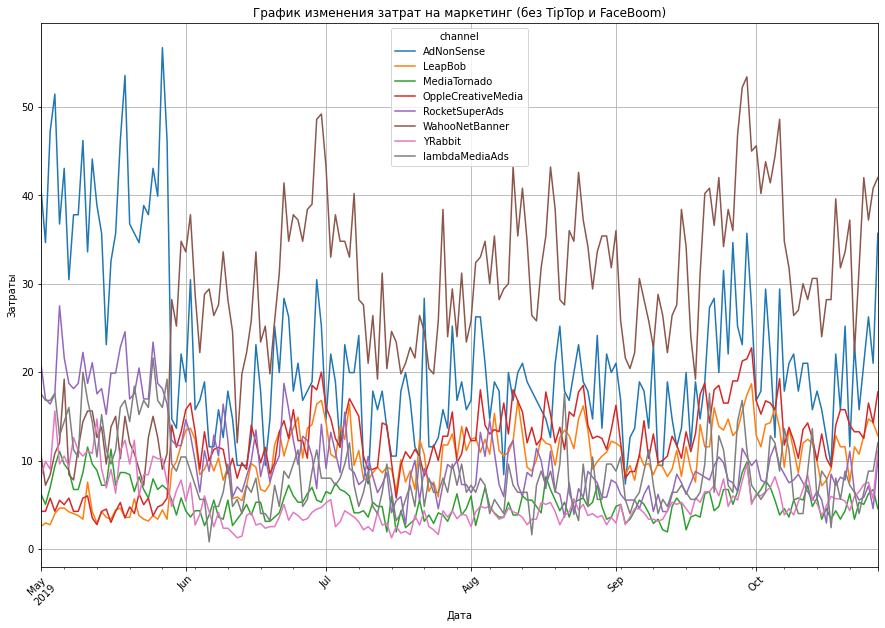

In [65]:
filtered_data2 = cost[~cost['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filtered_data2.plot(                                             
           figsize=(15, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
        
) 

plt.yticks(np.arange(0,  60, 10)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20.

In [66]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [67]:
profiles.describe()

,user_id,acquisition_cost
count,1.500080e+05,150008.000000
mean,4.993238e+11,0.703278
std,2.889483e+11,0.954097
min,5.993260e+05,0.000000
25%,2.489249e+11,0.000000
50%,4.977046e+11,0.247500
75%,7.494919e+11,1.108943
max,9.999996e+11,3.715385


Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71.

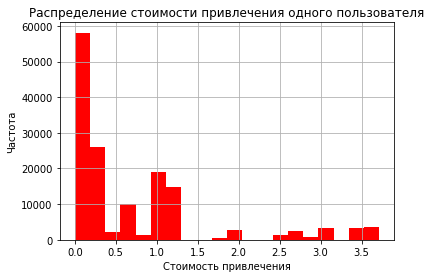

In [68]:
profiles['acquisition_cost'].hist(bins=20, color="red")
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Возможно, это органический трафик.

In [69]:
# Посмотрим на CAC для каждого источника трафика.

cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72.

#### Вывод

Общая сумма затрат на рекламу: 105497.

Исходя из графика видно увеличение расходов на маркетинг в течении времени. В конце сентября - начале октября они достигли исторического пика 630, после чего стали немного снижаться до 400, а затем к концу октября вновь стремились к 600.

Больше всего трат приходится на источник TipTop (51.90%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.
Больше всего трафика закупали у TipTop и к октябрю число трат приближалось к 650. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, т.к. на этом графике данные по ним недостаточно показательны.

Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20.

Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в среднем и медианой. Максимальная стоимость привлечения пользователя - 3.71.

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей.
Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72.



### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [70]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [71]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [72]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [73]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [74]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [75]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [76]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [77]:
#исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

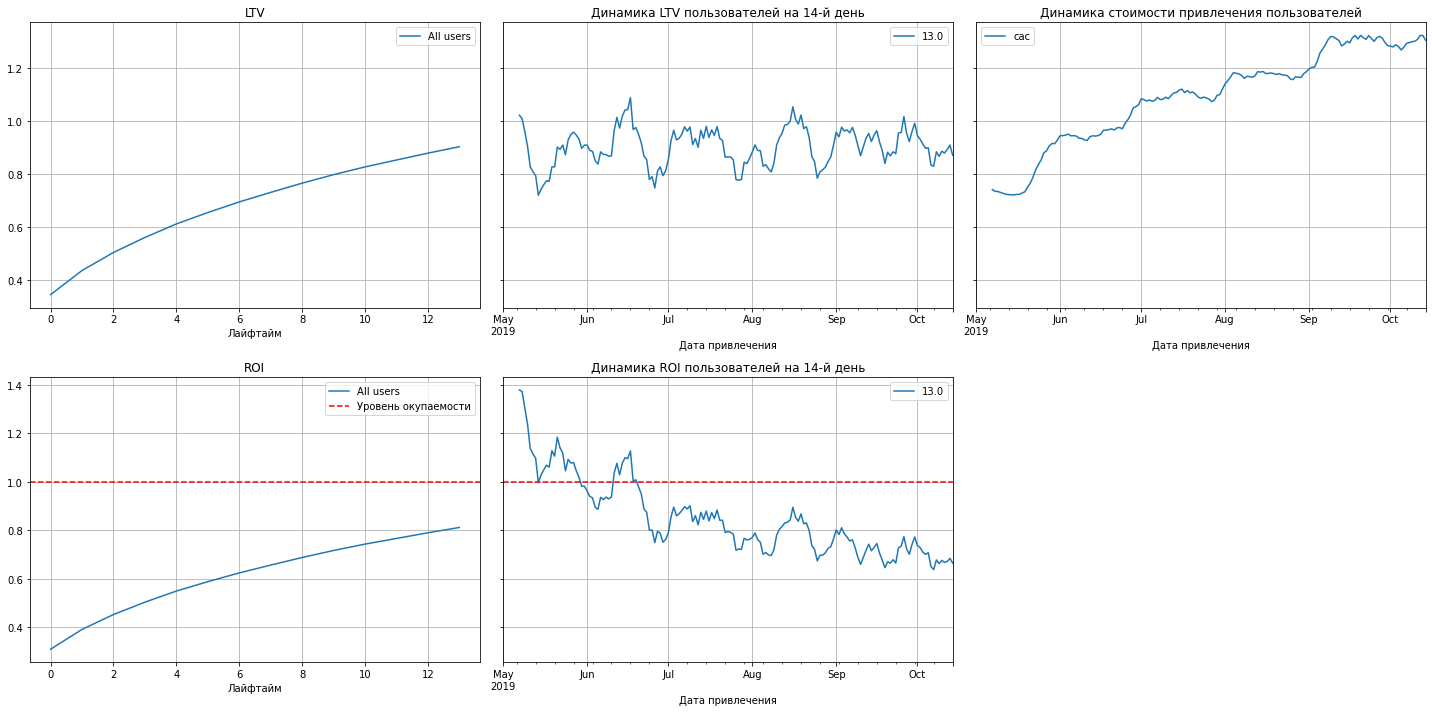

In [78]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Исходя из графиков, можно сказать:

1. Реклама не окупается к концу 2-й недели. ROI — примерно 80%.
2. CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователей заметно падает. До июля показатель был выше уровня окупаемости, но после стал падать примерно до 0.6.


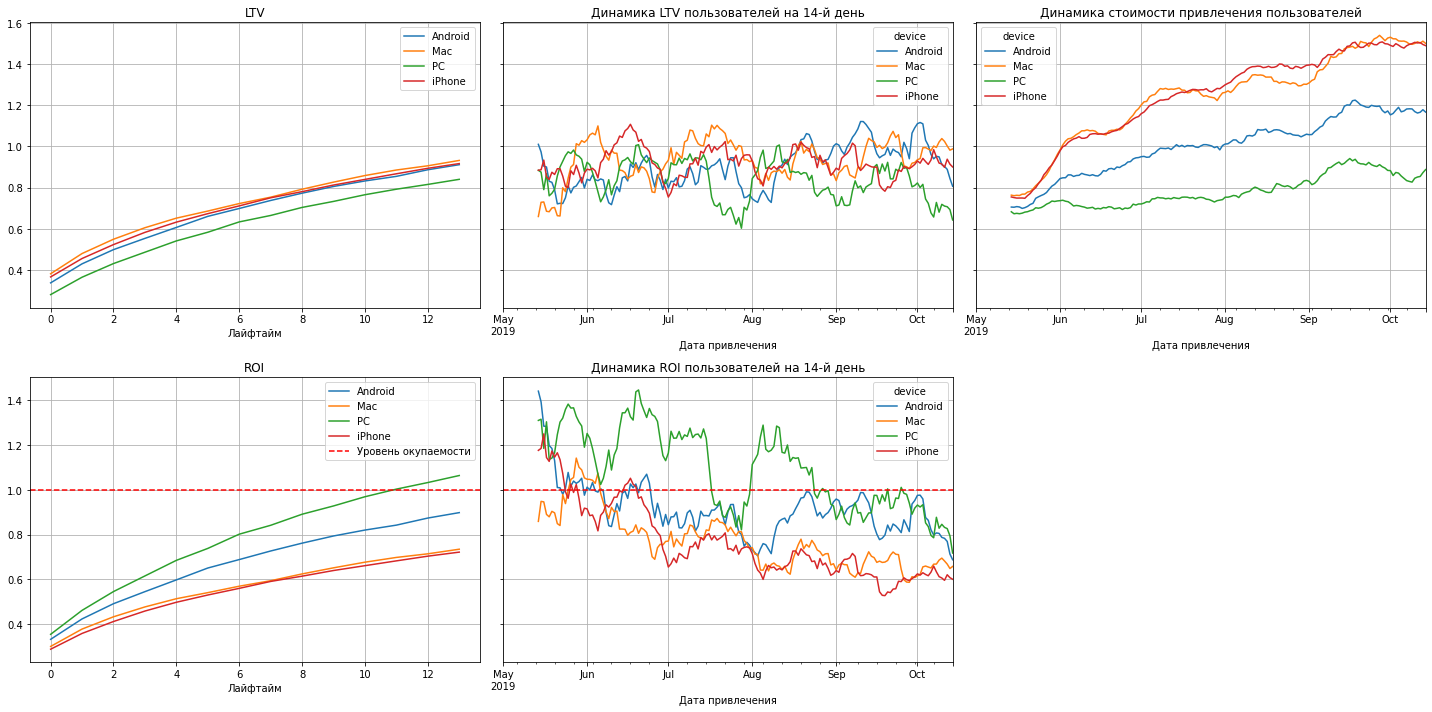

In [79]:
# Изучим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи всех устройств окупались до июня, а потом что-то пошло не так, особенно для владельцев Mac и Iphone. К сентябрю (и какое-то время в августе) ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня. LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Направить внимание следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает.

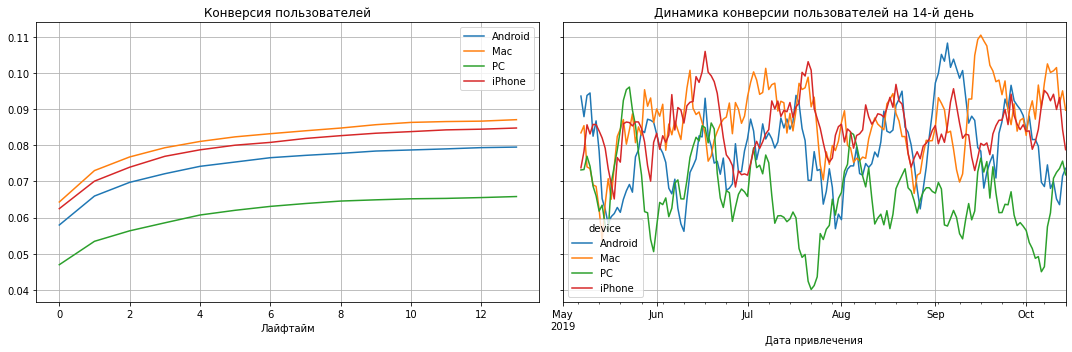

In [80]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Исходя из графиков, пользователи Mac, Android и iPhone конвертируются хорошо и постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

In [81]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

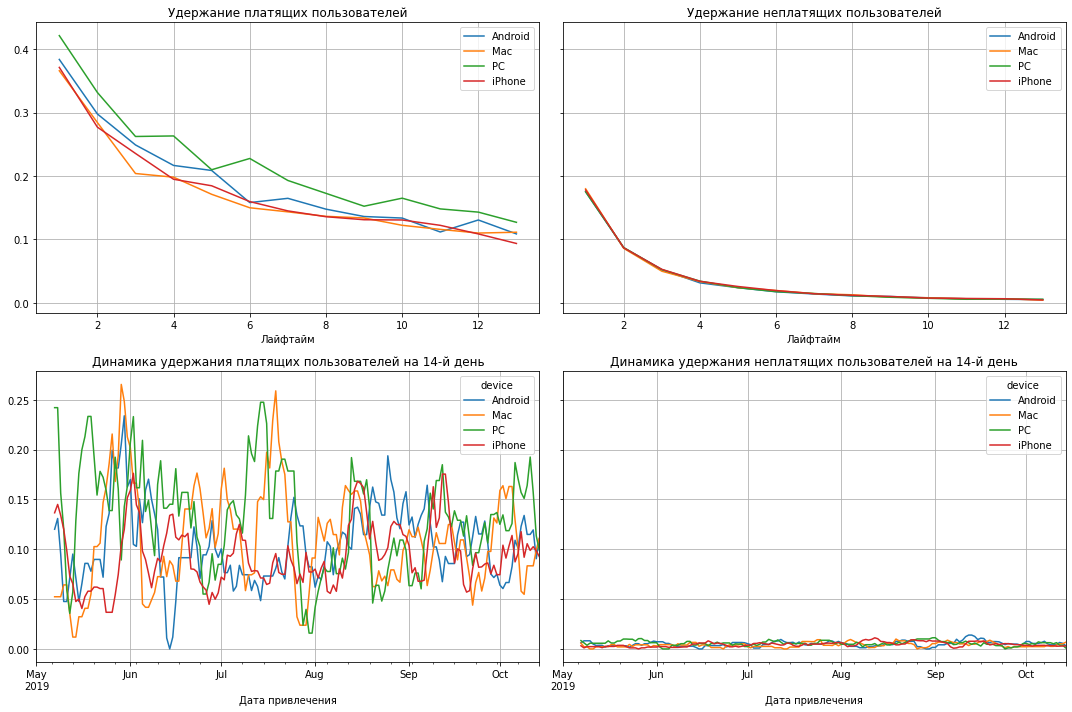

In [82]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Исходя из графика, не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

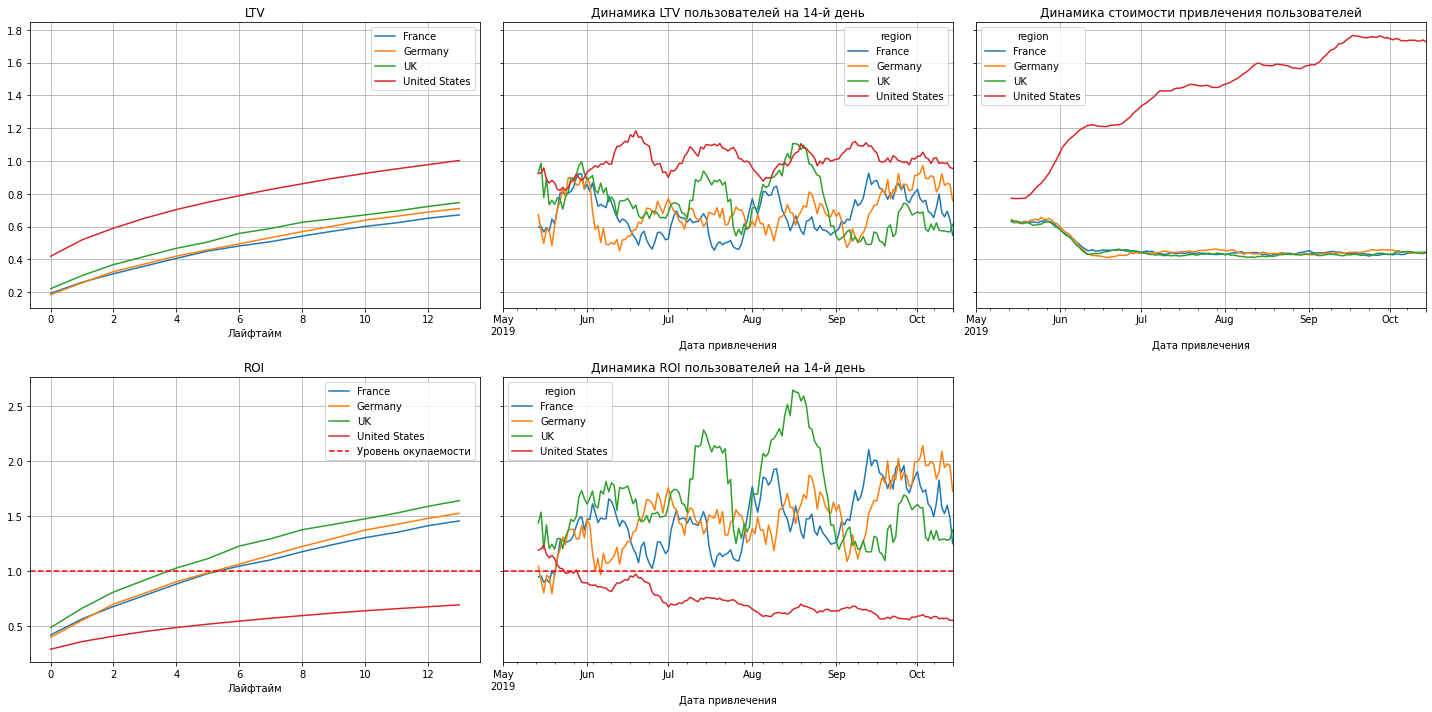

In [83]:
# Проанализируем окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Исходя из графиков:
1. Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США.
2. При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
3. LTV всё так же подвержен сезонности, но стабилен.
4. Лучше всего окупается Англия и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.


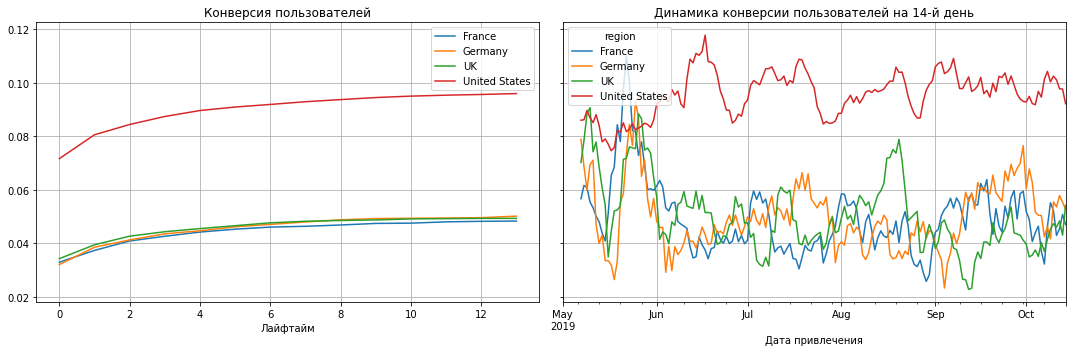

In [84]:
# Посмотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наименьшая конверсия у пользователей из Англии, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

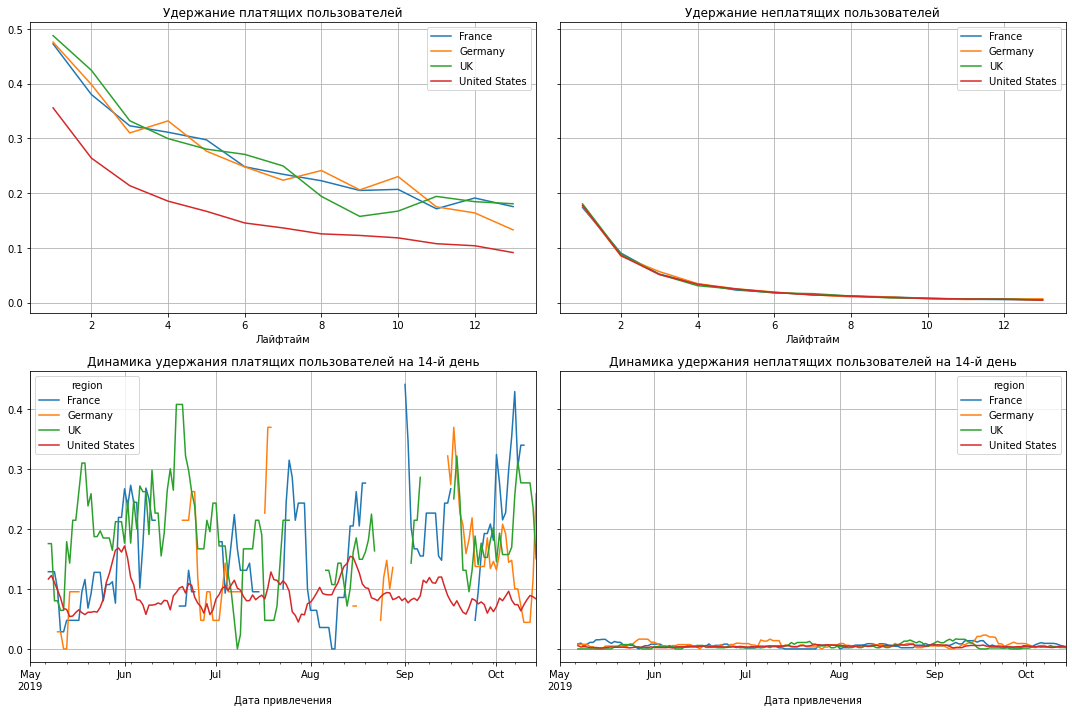

In [85]:
# Посмотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Исходя из графиков, пользователи из США явно плохо удерживаются.

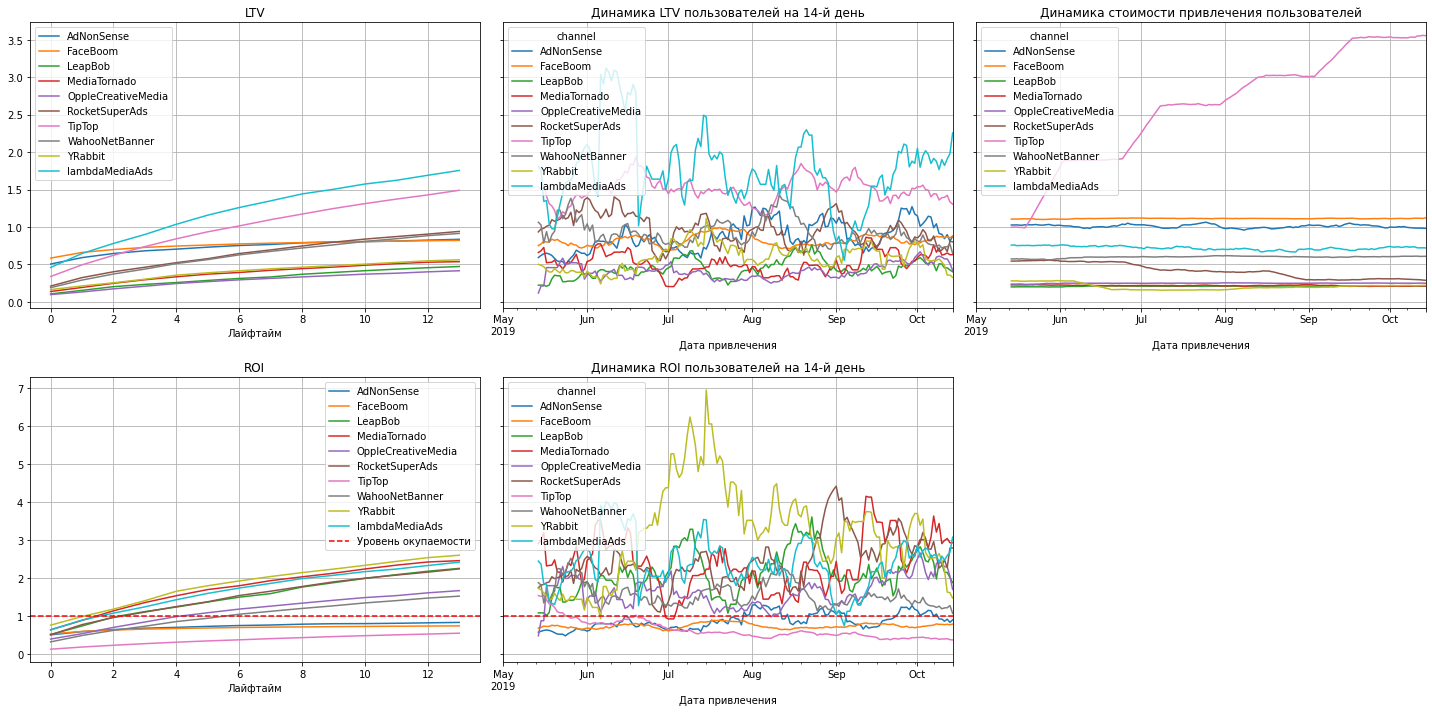

In [86]:
# Посмотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Анализируя графики, можно сказать:
Видно большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но прибыли от нее получилось не так много, как ожидалось.
Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Хорошие показатели у рекламной сети YRabbit в июле - ROI пользователей на 14 день был высок.

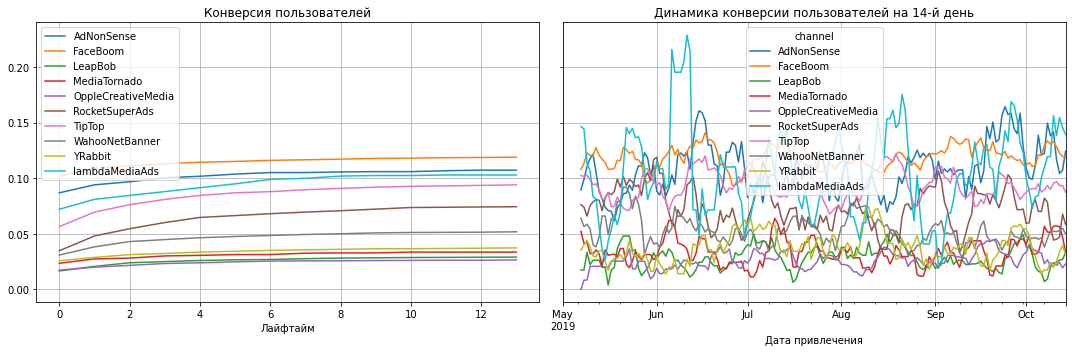

In [87]:
# Посмотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Ниже всего конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

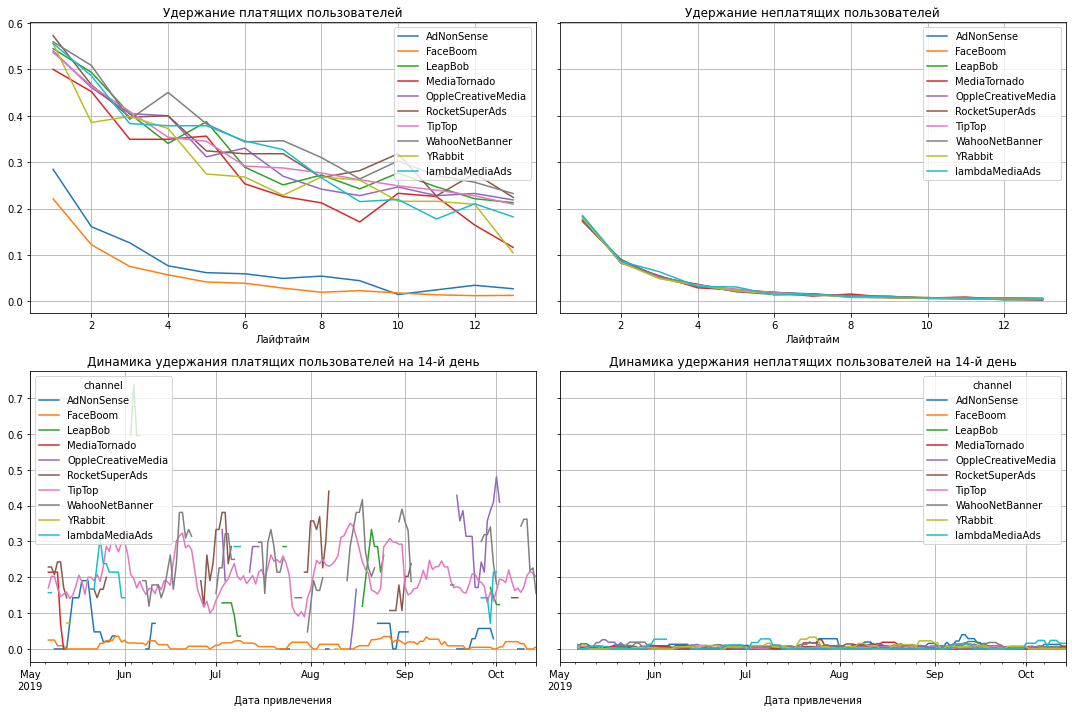

In [88]:
# Посмотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

#### Вывод
Проанализировав данные, реклама близка к окупемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения и то, что в анализ включены органические пользователи. Реклама почти окупается к концу 2-й недели. ROI — примерно 80%.
Окупаемость могут снижать владельцы Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Оценена окупаемость рекламы. Рассчитан и визуализирован LTV и ROI.

По графикам сделаны следующие выводы:

1.	Реклама не окупается к концу 2й недели. ROI — около 80%.
2.	CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
3.	На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4.	ROI пользователей неумолимо падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.
Чтобы разобраться в причинах, мы прошлись по всем доступным характеристикам пользователей — стране, каналу и устройству первого посещения.


1.	Разбивка по устройствам

Пользователи всех устройств окупались до июня, а потом что-то пошло не так, особенно для владельцев Mac и Iphone. К сентябрю (и какое-то время в августе) ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня.
LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.
Направить внимание следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает. Посчитана и визуализирована конверсия. Судя по графикам, пользователи Mac, Android и iPhone конвертируются неплохо, причём постоянно. Видимо, дело в удержании. Для проверки удержания использовались функции get_retention() и plot_retention(). Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Не платящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

2.	Разбивка по странам

Исходя из графиков:
- Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США.
- При этом стоимость привлечения пользователей из Америки - самая высокая.
- LTV всё так же подвержен сезонности, но стабилен.
- Лучше всего окупается Англия и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то изменения в продукте сыграли такую роль, и сервис стал менее привлекательным для пользователей.

Значит, надо направить внимание на пользователей из США.
Слабая конверсия у пользователей из Англии, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.
Видно также, что пользователи из США явно плохо удерживаются.
3.	Разбивка по каналам
Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.
Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.
Видим явных аутсайдеров - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.


#### Рекомендации для отдела маркетинга для повышения эффективности:

Направить внимание по окупаемости следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемость страдает. Возможно, стоит сделать какое-то маркетинговое предложение именно для владельцев устройств на базе этих ОС, чтобы они приносили продукту большую денежную ценность.
Для пользователей из США в целом уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из Америки - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США. Причем окупаемость пользователей начала падать с конца июня 2019 года - стоит также разобраться, что могло послужить причиной.

Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.

Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся довольно дешево. Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense. Можно попробовать переключить внимание на более дешевые, но прибыльные каналы.

Еще можно попробовать применить силу социальных сетей (рекламу блогеров, рекомендации на сайтах) - они сейчас очень динамично развиваются и являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.
